# Clustering Test

In [1]:
import pandas as pd
import numpy as np
import concurrent.futures as cf
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import nltk
import pickle
from glob import glob
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import csv
csv.field_size_limit(10000000)


pd.set_option('display.max_columns', None)

%matplotlib inline

csv.field_size_limit()

10000000

Let's make sure there are no missing values in this random sample.

# Section I - Get the Data

In [2]:
dtypes={'JobID': np.str, 'CleanJobTitle': np.str, 'JobDomain': np.str, 
        'CanonCity': np.str, 'CanonCountry': np.str, 'CanonState': np.str, 
        'JobText': np.str, 'JobURL': np.str, 'PostingHTML': np.float64, 
        'Source': np.str, 'JobReferenceID': np.str, 'Email': np.str, 
        'CanonEmployer': np.str, 'Latitude': np.str, 'Longitude': np.str, 
        'CanonIntermediary': np.str, 'Telephone': np.str, 'CanonJobTitle': np.str, 
        'CanonCounty': np.str, 'DivisionCode': np.str, 'MSA': np.str, 'LMA': np.str,
        'InternshipFlag': np.str, 'ConsolidatedONET': np.str, 'CanonCertification': np.str, 
        'CanonSkillClusters': np.str, 'CanonSkills': np.str, 'IsDuplicate': np.str, 
        'IsDuplicateOf': np.float64, 'CanonMaximumDegree': np.str, 'CanonMinimumDegree': np.str, 
        'CanonOtherDegrees': np.str, 'CanonPreferredDegrees': np.str,
        'CanonRequiredDegrees': np.str, 'CIPCode': np.str, 'StandardMajor': np.str, 
        'MaxExperience': np.str, 'MinExperience': np.str, 'ConsolidatedInferredNAICS': np.str, 
        'BGTOcc': np.str, 'MaxAnnualSalary': np.str, 'MaxHourlySalary': np.str, 
        'MinAnnualSalary': np.str, 'MinHourlySalary': np.str, 'YearsOfExperience': np.str, 
        'CanonJobHours': np.str, 'CanonJobType': np.str, 'CanonPostalCode': np.str, 
        'CanonYearsOfExperienceCanonLevel': np.str, 'CanonYearsOfExperienceLevel': np.str, 
        'ConsolidatedTitle': np.str, 'Language': np.str, 'BGTSubOcc': np.str, 'JobDate': np.str,
        'ConsolidatedDegreeLevels': np.str, 'MaxDegreeLevel': np.str, 'MinDegreeLevel': np.str
                       }

In [3]:
best_list = ['JobID', 'CleanJobTitle', 'CanonCity', 'CanonState', 'JobDate', 'JobText', 'Source', 'CanonEmployer',
             'Latitude', 'Longitude', 'CanonIntermediary', 'CanonJobTitle', 'CanonCounty', 'DivisionCode', 'MSA', 'LMA',
             'InternshipFlag', 'ConsolidatedONET', 'CanonSkillClusters', 'CanonSkills', 'IsDuplicate', 'CanonMinimumDegree', 
             'CanonRequiredDegrees', 'CIPCode', 'MinExperience', 'ConsolidatedInferredNAICS', 'BGTOcc', 'MaxAnnualSalary',
             'MaxHourlySalary', 'MinAnnualSalary', 'MinHourlySalary', 'YearsOfExperience', 'CanonJobHours', 'CanonJobType',
             'CanonPostalCode', 'CanonYearsOfExperienceCanonLevel', 'CanonYearsOfExperienceLevel', 'ConsolidatedTitle', 
             'Language', 'BGTSubOcc', 'ConsolidatedDegreeLevels', 'MaxDegreeLevel', 'MinDegreeLevel']

len(best_list)

43

In [4]:
files = glob('random_data/rand*.csv')
files[:4]

['random_data/rand_samp_13.csv',
 'random_data/rand_samp_07.csv',
 'random_data/rand_samp_20.csv',
 'random_data/rand_samp_17.csv']

In [5]:
%%time


def get_files(file):
    return pd.read_csv(file, dtype=dtypes, 
                     usecols=best_list, parse_dates=['JobDate'], low_memory=False)


with cf.ThreadPoolExecutor() as executor:
    results = executor.map(get_files, files)
    
df = pd.concat(results)
df.reset_index(drop=True, inplace=True)
df.head()

CPU times: user 3min 37s, sys: 37.2 s, total: 4min 14s
Wall time: 2min 55s


,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience
0,en,Nashville,TN,Project Manager Industrial And Capital Projects,2013-02-28,CLASSIFIEDS: FEATURED: | | | PROJECT MANAGE...,116829879,36.1073,-86.7757,37204,Davidson,NaN,MT473498,34980: Metropolitan Statistical Area,Volvo,NaN,11-904100,NaN,0,Job Board,Manufacturing and Production: Lean Manufacturi...,{'5S Methodology': 'Manufacturing and Producti...,FALSE,Bachelor of Science,Bachelor of Science,140101,8.0,3361.0,11-9041.00,NaN,NaN,NaN,NaN,fulltime,permanent,6+,high,16,"Project Manager, Industrial",NaN,16.0,Industrial Engineering Manager,2 or more years|minimum of 8 years
1,en,Moab,UT,"Group Manager, Hardlines",2013-08-05,"Hourly Group Manager, Hardlines\n\nLocation: U...",242995318,38.5586,-109.487,84532,Grand,NaN,CN490190,NaN,Alco Store,NaN,41-101100,NaN,0,Job Board,Sales: Merchandising;Specialized Skills|Specia...,{'Merchandising': 'Sales: Merchandising;Specia...,FALSE,NaN,NaN,NaN,NaN,4529.0,41-1011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manager,NaN,NaN,Retail Store Manager,NaN
2,en,Nashville,TN,Accounts Receivable Coordinator,2013-04-01,CLASSIFIEDS: FEATURED: | | | Accounts Recei...,16339489,36.1495,-86.789,37230,Davidson,NaN,MT473498,34980: Metropolitan Statistical Area,NaN,Accounts Receivable Coordinator,43-303100,NaN,0,Job Board,Finance: General Accounting;Specialized Skills...,{'Accounting': 'Finance: General Accounting;Sp...,FALSE,Bachelor's,NaN,NaN,1.0,6221.0,43-3031.00,NaN,NaN,NaN,NaN,NaN,NaN,0-1,low,16,Accounts Receivable Coordinator,16.0,16.0,Accounts Receivable / Payable Clerk,At least 1 year
3,en,Georgetown,MA,Fte Middle/High School Science Teacher,2013-07-27,Job Description\n Previous experience in worki...,241183199,42.7247,-70.9758,01833,Essex,73604.0,DV257360|MT257165,71650: Metropolitan NECTA|715: Combined NECTA,Georgetown Public Schools,NaN,25-203100,NaN,0,Recruiter,Common Skills|Education and Training: Teaching...,"{'Communication Skills': 'Common Skills', 'Tea...",FALSE,Bachelor's,Bachelor's,NaN,1.0,6111.0,25-2031.93,NaN,NaN,NaN,NaN,fulltime,permanent,0-1,low,16|18,High School Science Teacher,18.0,16.0,Science Teacher,At least 1 year
4,en,Watertown,MA,Benefits Services Assistant,2013-04-17,Benefits Services Assistant\n\n\n\nJob Details...,423136173,42.4164,-71.1776,02471,Middlesex,71654.0,DV257165|MT257165,71650: Metropolitan NECTA|715: Combined NECTA,NaN,NaN,13-114100,NaN,0,Recruiter,Customer and Client Support: Basic Customer Se...,{'Customer Service': 'Customer and Client Supp...,FALSE,Bachelor's,Bachelor's,NaN,0.5,5241.0,13-1141.00,NaN,NaN,NaN,NaN,NaN,NaN,0-1,low,16,Benefits Services Assistant,NaN,16.0,Compensation / Benefits Specialist,4 year|minimum of 6 months


In [6]:
len(df['CleanJobTitle'].unique()),len(df['ConsolidatedTitle'].unique()), len(df['CanonJobTitle'].unique())

(2736450, 663785, 14818)

In [7]:
df.shape

(6806118, 43)

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
df.info(memory_usage='deep')

In [10]:
%%time

df.isna().sum() / df.shape[0] * 100

CPU times: user 13.7 s, sys: 3.23 s, total: 17 s
Wall time: 17.1 s


Language                             0.000000
CanonCity                            2.133110
CanonState                           0.007714
CleanJobTitle                        0.028151
JobDate                              0.000000
JobText                              0.620647
JobID                                0.000000
Latitude                             2.132038
Longitude                            2.132038
CanonPostalCode                      2.397167
CanonCounty                          2.160292
DivisionCode                        67.986450
LMA                                  2.485367
MSA                                  4.758660
CanonEmployer                       36.349135
CanonJobTitle                       35.200786
ConsolidatedONET                     3.620889
CanonIntermediary                   85.723874
InternshipFlag                       0.000000
Source                               3.131903
CanonSkillClusters                   8.620009
CanonSkills                       

In [11]:
df = df[df['CleanJobTitle'].notnull()]
df = df[df['JobText'].notnull()]

In [12]:
df.shape

(6761974, 43)

In [14]:
df.drop_duplicates(subset=['ConsolidatedTitle']).shape[0]

660257

In [17]:
%%time

print("With Regular titles:")
print((df.shape[0] - df.drop_duplicates(subset=['CleanJobTitle']).shape[0]) / df.shape[0] * 100)
print("With Consolidated titles:")
print((df.shape[0] - df.drop_duplicates(subset=['ConsolidatedTitle']).shape[0]) / df.shape[0] * 100)

With Regular titles:
59.75732825946979
With Consolidated titles:
90.2357358960564
CPU times: user 5.01 s, sys: 578 ms, total: 5.59 s
Wall time: 5.58 s


In [18]:
df = df.drop_duplicates(subset=['CleanJobTitle']).sample(n=1_000_000)

# Section II: Clustering the Titles

## KMeans Approach the BOW-WOW 😮 Way

In [22]:
%%time

count_vect_uni = CountVectorizer(ngram_range=(1, 1), min_df=10) 
count_vect_bi = CountVectorizer(ngram_range=(1, 2), min_df=10) 
# count_vect_tri = CountVectorizer(ngram_range=(1, 3))

cv_titles_uni = count_vect_uni.fit_transform(df['CleanJobTitle'].values)
cv_titles_bi = count_vect_bi.fit_transform(df['CleanJobTitle'].values)
# cv_titles_tri = count_vect_tri.fit_transform(df['CleanJobTitle'].values)

cv_titles_uni.shape, cv_titles_bi.shape#, cv_titles_tri.shape

CPU times: user 18.3 s, sys: 137 ms, total: 18.5 s
Wall time: 18.5 s


((1000000, 12928), (1000000, 56098))

In [33]:
len(count_vect_bi.get_feature_names())

56098

In [34]:
%%time

num_clusters = [500, 1000]
cvs = [cv_titles_uni, cv_titles_bi]
cvs_names = ['cv_titles_uni', 'cv_titles_bi']

for i in num_clusters:
    
    for s, r in zip(cvs, cvs_names):
        km = KMeans(n_clusters=i, # how many clusters do we want
            max_iter=1000, # reshuffle each centroid x number of times
            n_init=25, # that x num of times can be set here
            random_state=42,
            n_jobs=-1 # number of cpu's to use in the computation
           )
        
        
        km.fit(s)
        
        model_name = (r[3:] + '_' + str(i))
        
        df[model_name] = km.labels_
        
        filename = (model_name + '.pkl')
        
        pickle.dump(km, open(filename, 'wb'))
        
#         outfile = open(models + filename, 'wb')
#         pickle.dump(km, outfile)
#         outfile.close()
    
    print(f"Done with k = {i}")

Done with k = 500
Done with k = 1000
CPU times: user 20.8 s, sys: 1min 23s, total: 1min 44s
Wall time: 5h 49min 53s


In [35]:
len(df.columns)

47

In [36]:
df.head()

,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,titles_uni_500,titles_bi_500,titles_uni_1000,titles_bi_1000
2613982,en,Richland,MI,Janitorial Entry Level,2011-07-08,"D & L INDUSTRIAL SERVICES, INC. ( Richland ) ...",3765226,42.3786,-85.4463,49083,Kalamazoo,NaN,MT262802,28020: Metropolitan Statistical Area,NaN,Janitor,37-201100,NaN,0,Job Board,Specialized Skills,{'Cleaning': 'Specialized Skills'},FALSE,NaN,NaN,NaN,NaN,NaN,37-2011.00,16640.0,8.0,16640.0,8.0,fulltime,permanent,NaN,NaN,NaN,Janitor,NaN,NaN,Janitor / Cleaner,NaN,333,327,698,115
4422308,en,Allentown,PA,Advertising Account Executive Key Accounts,2016-07-08,Advertising Account Executive (Key Accounts)\n...,38087992061,40.6023,-75.4707,18101,Lehigh,NaN,MT421090,10900: Metropolitan Statistical Area,Morning Call,Advertising Account Executive,41301100,NaN,0,Job Board,Marketing and Public Relations: Advertising;Sp...,{'Advertising': 'Marketing and Public Relation...,FALSE,Bachelor's,Bachelor's,NaN,2.0,NaN,41-3011.00,NaN,NaN,NaN,NaN,fulltime,permanent,1-6,mid,16,Advertising Account Executive,16.0,16.0,Advertising Account Executive,At least 2-4 years|2 to 3 years,156,56,995,286
3543979,en,Hanover,NJ,Crop Protection Sales Specialist For Bayer Cro...,2018-06-14,.\n\n Crop Protection Sales Specialist for...,38379581429,40.8218,-74.422,07981,Morris,35084.0,DV343508|MT363562,35620: Metropolitan Statistical Area|408: Comb...,Bayer Corporation,Sales Specialist,41401200,NaN,0,Company,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,FALSE,NaN,NaN,NaN,NaN,325412.0,41-4011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales Specialist,NaN,NaN,Sales Representative,NaN,0,486,581,196
1883423,en,Milwaukee,WI,Program And Policy Chief Performance Improveme...,2017-03-27,In partnership with Hispanic Professionals of ...,38202025999,43.0343,-87.9151,53201,Milwaukee,NaN,MT553334,33340: Metropolitan Statistical Area,Wisdot,NaN,11919900,NaN,0,Job Board,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,FALSE,NaN,NaN,NaN,NaN,NaN,11-9199.00,90209.0,43.37,62400.0,30.0,fulltime,permanent,NaN,NaN,NaN,Chief Program Performance Manager,NaN,NaN,Program Officer,NaN,313,158,58,607
1349777,en,West Caldwell,NJ,Machine Operator/Nutraceutical,2020-07-17,Machine Operator / Nutraceutical\n\nVitaquest\...,38815921335,40.8069,-74.2778,07006,Essex,35084.0,DV343508|MT363562,35620: Metropolitan Statistical Area|408: Comb...,Vitaquest,Machine Operator,51919900,NaN,0,Job Board,Science and Research: Biopharmaceutical Manufa...,{'Batch Records': 'Science and Research: Bioph...,FALSE,Higher Secondary Certificate,Higher Secondary Certificate,NaN,1.0,NaN,51-9012.92,NaN,NaN,NaN,NaN,fulltime,permanent,0-1,low,12,Machine Operator,NaN,12.0,Manufacturing Machine Operator,Minimum of 1 year,212,227,653,642


In [37]:
%%time

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 2613982 to 1997488
Data columns (total 47 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   Language                          1000000 non-null  object        
 1   CanonCity                         972846 non-null   object        
 2   CanonState                        999883 non-null   object        
 3   CleanJobTitle                     1000000 non-null  object        
 4   JobDate                           1000000 non-null  datetime64[ns]
 5   JobText                           1000000 non-null  object        
 6   JobID                             1000000 non-null  object        
 7   Latitude                          972876 non-null   object        
 8   Longitude                         972876 non-null   object        
 9   CanonPostalCode                   969768 non-null   object        
 10  CanonCounty 

In [38]:
files = glob('*.pkl')
len(files), files

(4,
 ['titles_bi_1000.pkl',
  'titles_uni_500.pkl',
  'titles_bi_500.pkl',
  'titles_uni_1000.pkl'])

In [40]:
%%time


for model in files:
    
    in_model = open(model, 'rb')
    loaded_model = pickle.load(in_model)
    df[model[:-4]] = loaded_model.labels_
    
    if 'uni' in model:
        
        distance = loaded_model.transform(cv_titles_uni)
        df['dist_' + model[6:-4]] = distance.sum(axis=1).round(2)
    
    elif 'bi' in model:
        
        distance = loaded_model.transform(cv_titles_bi)
        df['dist_' + model[6:-4]] = distance.sum(axis=1).round(2)
    
    else:
        
        distance = loaded_model.transform(cv_titles_tri)
        df['dist_' + model[6:-4]] = distance.sum(axis=1).round(2)        
    
    in_model.close()

df.head()

CPU times: user 31.3 s, sys: 14.3 s, total: 45.6 s
Wall time: 47.3 s


,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,titles_uni_500,titles_bi_500,titles_uni_1000,titles_bi_1000,dist__bi_1000,dist__uni_500,dist__bi_500,dist__uni_1000
2613982,en,Richland,MI,Janitorial Entry Level,2011-07-08,"D & L INDUSTRIAL SERVICES, INC. ( Richland ) ...",3765226,42.3786,-85.4463,49083,Kalamazoo,NaN,MT262802,28020: Metropolitan Statistical Area,NaN,Janitor,37-201100,NaN,0,Job Board,Specialized Skills,{'Cleaning': 'Specialized Skills'},FALSE,NaN,NaN,NaN,NaN,NaN,37-2011.00,16640.0,8.0,16640.0,8.0,fulltime,permanent,NaN,NaN,NaN,Janitor,NaN,NaN,Janitor / Cleaner,NaN,333,327,698,115,2847.77,1172.04,1379.85,2378.15
4422308,en,Allentown,PA,Advertising Account Executive Key Accounts,2016-07-08,Advertising Account Executive (Key Accounts)\n...,38087992061,40.6023,-75.4707,18101,Lehigh,NaN,MT421090,10900: Metropolitan Statistical Area,Morning Call,Advertising Account Executive,41301100,NaN,0,Job Board,Marketing and Public Relations: Advertising;Sp...,{'Advertising': 'Marketing and Public Relation...,FALSE,Bachelor's,Bachelor's,NaN,2.0,NaN,41-3011.00,NaN,NaN,NaN,NaN,fulltime,permanent,1-6,mid,16,Advertising Account Executive,16.0,16.0,Advertising Account Executive,At least 2-4 years|2 to 3 years,156,56,995,286,3631.16,1371.38,1783.33,2770.52
3543979,en,Hanover,NJ,Crop Protection Sales Specialist For Bayer Cro...,2018-06-14,.\n\n Crop Protection Sales Specialist for...,38379581429,40.8218,-74.422,07981,Morris,35084.0,DV343508|MT363562,35620: Metropolitan Statistical Area|408: Comb...,Bayer Corporation,Sales Specialist,41401200,NaN,0,Company,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,FALSE,NaN,NaN,NaN,NaN,325412.0,41-4011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales Specialist,NaN,NaN,Sales Representative,NaN,0,486,581,196,4453.73,1814.80,2200.47,3651.45
1883423,en,Milwaukee,WI,Program And Policy Chief Performance Improveme...,2017-03-27,In partnership with Hispanic Professionals of ...,38202025999,43.0343,-87.9151,53201,Milwaukee,NaN,MT553334,33340: Metropolitan Statistical Area,Wisdot,NaN,11919900,NaN,0,Job Board,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,FALSE,NaN,NaN,NaN,NaN,NaN,11-9199.00,90209.0,43.37,62400.0,30.0,fulltime,permanent,NaN,NaN,NaN,Chief Program Performance Manager,NaN,NaN,Program Officer,NaN,313,158,58,607,3851.57,1508.76,1898.18,3053.94
1349777,en,West Caldwell,NJ,Machine Operator/Nutraceutical,2020-07-17,Machine Operator / Nutraceutical\n\nVitaquest\...,38815921335,40.8069,-74.2778,07006,Essex,35084.0,DV343508|MT363562,35620: Metropolitan Statistical Area|408: Comb...,Vitaquest,Machine Operator,51919900,NaN,0,Job Board,Science and Research: Biopharmaceutical Manufa...,{'Batch Records': 'Science and Research: Bioph...,FALSE,Higher Secondary Certificate,Higher Secondary Certificate,NaN,1.0,NaN,51-9012.92,NaN,NaN,NaN,NaN,fulltime,permanent,0-1,low,12,Machine Operator,NaN,12.0,Manufacturing Machine Operator,Minimum of 1 year,212,227,653,642,2668.94,1062.01,1292.53,2162.32


In [42]:
for i in df.columns:
    if 'dist' in i:
        df[i + '_dummy'] = np.where(df[i] < np.percentile(df[i], 5), 1, 0)

df.head()

,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,titles_uni_500,titles_bi_500,titles_uni_1000,titles_bi_1000,dist__bi_1000,dist__uni_500,dist__bi_500,dist__uni_1000,dist__bi_1000_dummy,dist__uni_500_dummy,dist__bi_500_dummy,dist__uni_1000_dummy
2613982,en,Richland,MI,Janitorial Entry Level,2011-07-08,"D & L INDUSTRIAL SERVICES, INC. ( Richland ) ...",3765226,42.3786,-85.4463,49083,Kalamazoo,NaN,MT262802,28020: Metropolitan Statistical Area,NaN,Janitor,37-201100,NaN,0,Job Board,Specialized Skills,{'Cleaning': 'Specialized Skills'},FALSE,NaN,NaN,NaN,NaN,NaN,37-2011.00,16640.0,8.0,16640.0,8.0,fulltime,permanent,NaN,NaN,NaN,Janitor,NaN,NaN,Janitor / Cleaner,NaN,333,327,698,115,2847.77,1172.04,1379.85,2378.15,0,0,0,0
4422308,en,Allentown,PA,Advertising Account Executive Key Accounts,2016-07-08,Advertising Account Executive (Key Accounts)\n...,38087992061,40.6023,-75.4707,18101,Lehigh,NaN,MT421090,10900: Metropolitan Statistical Area,Morning Call,Advertising Account Executive,41301100,NaN,0,Job Board,Marketing and Public Relations: Advertising;Sp...,{'Advertising': 'Marketing and Public Relation...,FALSE,Bachelor's,Bachelor's,NaN,2.0,NaN,41-3011.00,NaN,NaN,NaN,NaN,fulltime,permanent,1-6,mid,16,Advertising Account Executive,16.0,16.0,Advertising Account Executive,At least 2-4 years|2 to 3 years,156,56,995,286,3631.16,1371.38,1783.33,2770.52,0,0,0,0
3543979,en,Hanover,NJ,Crop Protection Sales Specialist For Bayer Cro...,2018-06-14,.\n\n Crop Protection Sales Specialist for...,38379581429,40.8218,-74.422,07981,Morris,35084.0,DV343508|MT363562,35620: Metropolitan Statistical Area|408: Comb...,Bayer Corporation,Sales Specialist,41401200,NaN,0,Company,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,FALSE,NaN,NaN,NaN,NaN,325412.0,41-4011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales Specialist,NaN,NaN,Sales Representative,NaN,0,486,581,196,4453.73,1814.80,2200.47,3651.45,0,0,0,0
1883423,en,Milwaukee,WI,Program And Policy Chief Performance Improveme...,2017-03-27,In partnership with Hispanic Professionals of ...,38202025999,43.0343,-87.9151,53201,Milwaukee,NaN,MT553334,33340: Metropolitan Statistical Area,Wisdot,NaN,11919900,NaN,0,Job Board,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,FALSE,NaN,NaN,NaN,NaN,NaN,11-9199.00,90209.0,43.37,62400.0,30.0,fulltime,permanent,NaN,NaN,NaN,Chief Program Performance Manager,NaN,NaN,Program Officer,NaN,313,158,58,607,3851.57,1508.76,1898.18,3053.94,0,0,0,0
1349777,en,West Caldwell,NJ,Machine Operator/Nutraceutical,2020-07-17,Machine Operator / Nutraceutical\n\nVitaquest\...,38815921335,40.8069,-74.2778,07006,Essex,35084.0,DV343508|MT363562,35620: Metropolitan Statistical Area|408: Comb...,Vitaquest,Machine Operator,51919900,NaN,0,Job Board,Science and Research: Biopharmaceutical Manufa...,{'Batch Records': 'Science and Research: Bioph...,FALSE,Higher Secondary Certificate,Higher Secondary Certificate,NaN,1.0,NaN,51-9012.92,NaN,NaN,NaN,NaN,fulltime,permanent,0-1,low,12,Machine Operator,NaN,12.0,Manufacturing Machine Operator,Minimum of 1 year,212,227,653,642,2668.94,1062.01,1292.53,2162.32,0,0,0,0


In [43]:
df.reset_index(drop=True, inplace=True)

In [45]:
df.describe()

,titles_uni_500,titles_bi_500,titles_uni_1000,titles_bi_1000,dist__bi_1000,dist__uni_500,dist__bi_500,dist__uni_1000,dist__bi_1000_dummy,dist__uni_500_dummy,dist__bi_500_dummy,dist__uni_1000_dummy
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,209.643288,248.940634,428.795515,408.080130,3273.792615,1312.110120,1600.711341,2658.077169,0.049998,0.049976,0.049960,0.049995
std,151.777312,141.211350,303.479580,312.003278,544.432817,199.941563,277.649784,395.723026,0.217941,0.217895,0.217862,0.217935
min,0.000000,0.000000,0.000000,0.000000,1998.840000,782.290000,941.160000,1621.300000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,135.000000,136.000000,122.000000,2859.220000,1172.520000,1389.030000,2381.320000,0.000000,0.000000,0.000000,0.000000
50%,193.000000,248.000000,395.000000,334.000000,3190.090000,1272.610000,1558.440000,2579.080000,0.000000,0.000000,0.000000,0.000000
75%,344.000000,381.000000,696.000000,687.000000,3591.990000,1420.620000,1763.970000,2875.552500,0.000000,0.000000,0.000000,0.000000
max,499.000000,499.000000,999.000000,999.000000,12120.290000,5481.170000,6049.260000,10977.020000,1.000000,1.000000,1.000000,1.000000


In [49]:
df.shape

(1000000, 55)

In [46]:
df1 = df[:len(df)//2]
df2 = df[len(df)//2:]

In [47]:
df1.shape

(500000, 55)

In [48]:
df2.shape

(500000, 55)

In [51]:
df2.head(3)

,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,titles_uni_500,titles_bi_500,titles_uni_1000,titles_bi_1000,dist__bi_1000,dist__uni_500,dist__bi_500,dist__uni_1000,dist__bi_1000_dummy,dist__uni_500_dummy,dist__bi_500_dummy,dist__uni_1000_dummy
500000,en,New York,NY,"Tax Documentation Specialist, Client Service",2020-05-17,"Tax Documentation Specialist, Client Service\n...",38780775287,40.7501,-73.997,10001,New York,35614.0,DV363564|MT363562,35620: Metropolitan Statistical Area|408: Comb...,NaN,Tax Specialist,43405100,MISSION STAFFING,0,Job intermediary,Specialized Skills|Common Skills|Customer and ...,"{'Analytical Skills': 'Specialized Skills', 'C...",FALSE,NaN,NaN,NaN,2.0,NaN,43-4051.00,60000.0,28.85,50000.0,24.04,fulltime,permanent,1-6,mid,NaN,Tax Specialist,NaN,NaN,Client Service Representative / Associate,2+ years|2 years,436,111,445,630,3470.94,1358.87,1699.19,2744.97,0,0,0,0
500001,en,NaN,NJ,Scientific Leader,2014-04-22,Kelly Scientific Resources\n\nScientific Leade...,765891105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41401100,Kelly Services,0,Job intermediary,Science and Research: Drug Development;Special...,{'Biomarkers': 'Science and Research: Drug Dev...,FALSE,Doctor of Philosophy,NaN,260800,NaN,3254.0,41-4011.00,NaN,NaN,NaN,NaN,fulltime,temporary,NaN,NaN,21,Scientific Leader,21.0,21.0,Sales Representative,NaN,92,411,382,539,2471.25,1063.01,1189.15,2166.86,1,0,1,0
500002,en,Morgantown,WV,Hvac Trades Specialist I,2016-03-10,West Virginia University HVAC Trades Specialis...,38033882395,39.6272,-79.9854,26501,Monongalia,NaN,MT543406,34060: Metropolitan Statistical Area,West Virginia University,NaN,49902101,NaN,0,Job Board,"Maintenance, Repair, and Installation: HVAC;Sp...","{'Condensers': 'Maintenance, Repair, and Insta...",FALSE,NaN,NaN,NaN,NaN,611310.0,49-9021.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hvac Specialist,NaN,NaN,HVAC Mechanic / Installer,NaN,395,4,110,813,2843.66,1169.64,1381.29,2368.97,0,0,0,0


In [52]:
%%time

df1.to_csv('km_500and1000_first.csv', index=False)
df2.to_csv('km_500and1000_sec.csv', index=False)

CPU times: user 1min 20s, sys: 2.88 s, total: 1min 23s
Wall time: 1min 23s


In [12]:
(df.drop_duplicates()
   .sample(2000)
   .to_csv(path_out + 'kmeans_titles_approach_2k_unique_2.csv', index=False))

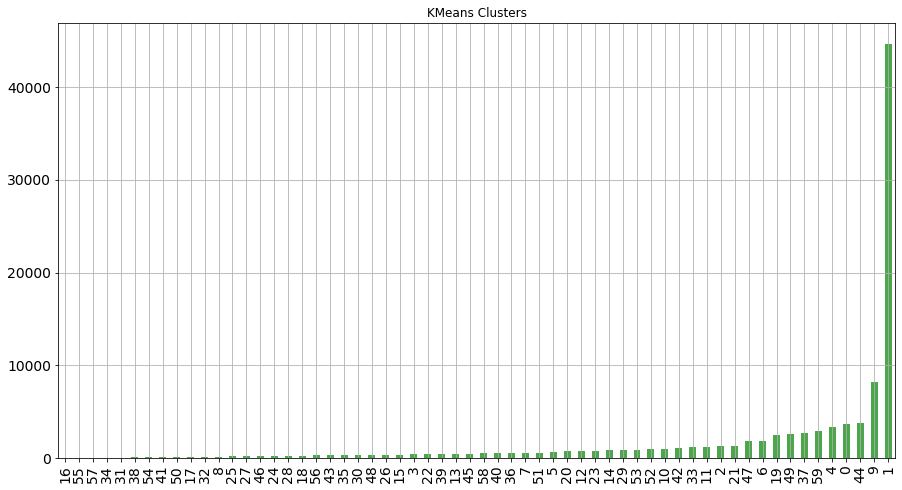

In [13]:
pd.Series(Counter(km.labels_)).sort_values().plot(kind='bar',
                                    rot=90, 
                                    figsize=(15, 8),
                                    fontsize=14,
                                    color='green',
                                    title='KMeans Clusters',
                                    grid=True,
                                    alpha=0.70);

In [37]:
df.loc[df['km_bi_30'] == 11, 'CleanJobTitle'].head(20)

2423                  Pt Produce Associate - Food Lion
2994        Pt Frozen Food/Dairy Associate - Food Lion
3506                  Pt Grocery Associate - Food Lion
4414                    Pt Sales Associate - Food Lion
5269           Center Store Grocery Manager- Food Lion
7764                Pt Perishable Associate- Food Lion
9234        Pt Quality Assurance Associate - Food Lion
9789     Pt Center Store Grocery Associate - Food Lion
12078                   Pt Sales Associate - Food Lion
14725                          Meat Cutter - Food Lion
15403                         Dsd Receiver - Food Lion
15557                          Meat Cutter - Food Lion
15770                 Pt Grocery Associate - Food Lion
15888             Pt Deli/Bakery Associate - Food Lion
17862             Dry Lead And Trainer Asm - Food Lion
18322                 Pt Service Associate - Food Lion
19441                Deli/Bakery Associate - Food Lion
19995             Pt Deli/Bakery Associate - Food Lion
20113     

In [5]:
cv_titles_tri

<100000x219486 sparse matrix of type '<class 'numpy.int64'>'
	with 784068 stored elements in Compressed Sparse Row format>

In [84]:
from sklearn.metrics import silhouette_score

In [6]:
%%time

num_clusters = [500, 1000]
cvs = [cv_titles_uni, cv_titles_bi, cv_titles_tri]
cvs_names = ['cv_titles_uni', 'cv_titles_bi', 'cv_titles_tri']


for i in num_clusters:
        
    for s, r in zip(cvs, cvs_names):
                
        km = KMeans(n_clusters=i, # how many clusters do we want
            max_iter=1000, # reshuffle each centroid x number of times
            n_init=25, # that x num of times can be set here
            random_state=42,
            n_jobs=4 # number of cpu's to use in the computation
           )
        
        
        km.fit(s)
                
        model_name = (r[3:] + '_' + str(i))
        
        df[model_name] = km.labels_
        
        filename = (model_name + '.pkl')
        
        pickle.dump(km, open(filename, 'wb'))
        
    
    print(f"Done with k = {i}")

NameError: name 'silhouette_score' is not defined

In [9]:
files = glob('*.pkl')
files

['titles_bi_1000.pkl',
 'titles_uni_500.pkl',
 'titles_uni_1000.pkl',
 'titles_bi_500.pkl',
 'titles_tri_500.pkl']

In [10]:
for model in files:
    
    in_model = open(model, 'rb')
    loaded_model = pickle.load(in_model)
    df[model[:-4]] = loaded_model.labels_
    in_model.close()

df.head()

,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,year,clean_text,charac_text_len,low_clean,list_job_text,list_title_words,len_job_text,normal_text,normal_titles,titles_bi_1000,titles_uni_500,titles_uni_1000,titles_bi_500,titles_tri_500
0,en,McLean,VA,Public Sector Sap Training Lead,2012-07-05,United States US home Careers home Campus Int...,129092937,38.9498,-77.2278,22103.0,Fairfax,47894.0,DV114789|MT114790,47900: Metropolitan Statistical Area|548: Comb...,PricewaterhouseCoopers,NaN,15-119900,NaN,0,Company,Finance: General Accounting;Specialized Skills...,{'Accounting': 'Finance: General Accounting;Sp...,False,Bachelor of Science,Bachelor of Science|Bachelor's,NaN,6.0,541219.0,15-1199.00,NaN,NaN,NaN,NaN,NaN,NaN,6+,high,16,Public Sector Sap Training Lead,NaN,16.0,Technical Consultant / Analyst,6-10 years,2012,United States US home Careers home Campus Int...,8209,united states us home careers home campus int...,"['United', 'States', 'US', 'home', 'Careers', ...","['Public', 'Sector', 'Sap', 'Training', 'Lead']",1175,united states us home careers home campus inte...,public sector sap training lead,177,272,97,10,5
1,en,Cary,NC,Maintenance Supervisor,2017-11-12,"Maintenance Supervisor\n\nCary, North Carolina...",38298165295,35.7585,-78.7783,27511.0,Wake,NaN,MT373958,39580: Metropolitan Statistical Area,Real Estate,Maintenance Supervisor,49101100,NaN,0,Job Board,"Maintenance, Repair, and Installation: HVAC;Sp...","{'HVAC': 'Maintenance, Repair, and Installatio...",False,Higher Secondary Certificate,General Equivalency Degree,NaN,2.0,5312.0,49-1011.00,NaN,NaN,NaN,NaN,fulltime,permanent,1-6,mid,12,Maintenance Supervisor,12.0,12.0,Maintenance Supervisor,Minimum of 2-3 years,2017,"Maintenance Supervisor Cary, North Carolina - ...",1517,"maintenance supervisor cary, north carolina - ...","['Maintenance', 'Supervisor', 'Cary,', 'North'...","['Maintenance', 'Supervisor']",217,maintenance supervisor cary north carolina usd...,maintenance supervisor,724,63,244,354,362
2,en,Seattle,WA,Junior Network Engineer,2016-01-30,Jr. Network Engineer Insight Global Seattle...,38014986781,47.7593,-122.2520,98028.0,King,42644.0,DV534264|MT534266,42660: Metropolitan Statistical Area|500: Comb...,Recruiting Agency,Junior Network Engineer,15114300,Insight Global Incorporated,0,Job intermediary,Information Technology: General Networking;Spe...,{'Cisco': 'Information Technology: General Net...,False,NaN,NaN,NaN,NaN,54.0,15-1199.02,NaN,NaN,NaN,NaN,fulltime,permanent,NaN,NaN,NaN,Junior Network Engineer,NaN,NaN,Network Engineer / Architect,NaN,2016,Jr. Network Engineer Insight Global Seattle...,1895,jr. network engineer insight global seattle...,"['Jr.', 'Network', 'Engineer', 'Insight', 'Glo...","['Junior', 'Network', 'Engineer']",280,jr network engineer insight global seattle wa ...,junior network engineer,368,222,8,29,424
3,en,Concord,CA,Loss Prevention Associate,2012-08-22,Current Job Stats 154 New Jobs Posted Today 2...,142560438,37.9834,-122.0370,94520.0,Contra Costa,36084.0,DV063608|MT064186,41860: Metropolitan Statistical Area|488: Comb...,Sears,Loss Prevention Associate,11-919908,NaN,0,Company from Job Board,Public Safety and National Security: Loss Prev...,{'Asset Protection': 'Public Safety and Nation...,False,NaN,NaN,NaN,NaN,452111.0,33-1099.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loss Prevention Associate,NaN,NaN,Loss Prevention / Asset Protection Specialist,NaN,2012,Current Job Stats 154 New Jobs P

In [ ]:
%%time

km = KMeans(n_clusters=1000, # how many clusters do we want
        max_iter=1000, # reshuffle each centroid x number of times
        n_init=25, # that x num of times can be set here
        random_state=42,
        n_jobs=4 # number of cpu's to use in the computation
       )


km.fit(cv_titles_tri)

model_name = 'titles_tri_1000'

df[model_name] = km.labels_

filename = (model_name + '.pkl')

pickle.dump(km, open(filename, 'wb'))

In [79]:
df.head()

,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,year,clean_text,charac_text_len,low_clean,list_job_text,list_title_words,len_job_text,normal_text,normal_titles,500_cluster,1000_cluster
0,en,McLean,VA,Public Sector Sap Training Lead,2012-07-05,United States US home Careers home Campus Int...,129092937,38.9498,-77.2278,22103.0,Fairfax,47894.0,DV114789|MT114790,47900: Metropolitan Statistical Area|548: Comb...,PricewaterhouseCoopers,NaN,15-119900,NaN,0,Company,Finance: General Accounting;Specialized Skills...,{'Accounting': 'Finance: General Accounting;Sp...,False,Bachelor of Science,Bachelor of Science|Bachelor's,NaN,6.0,541219.0,15-1199.00,NaN,NaN,NaN,NaN,NaN,NaN,6+,high,16,Public Sector Sap Training Lead,NaN,16.0,Technical Consultant / Analyst,6-10 years,2012,United States US home Careers home Campus Int...,8209,united states us home careers home campus int...,"['United', 'States', 'US', 'home', 'Careers', ...","['Public', 'Sector', 'Sap', 'Training', 'Lead']",1175,united states us home careers home campus inte...,public sector sap training lead,272,97
1,en,Cary,NC,Maintenance Supervisor,2017-11-12,"Maintenance Supervisor\n\nCary, North Carolina...",38298165295,35.7585,-78.7783,27511.0,Wake,NaN,MT373958,39580: Metropolitan Statistical Area,Real Estate,Maintenance Supervisor,49101100,NaN,0,Job Board,"Maintenance, Repair, and Installation: HVAC;Sp...","{'HVAC': 'Maintenance, Repair, and Installatio...",False,Higher Secondary Certificate,General Equivalency Degree,NaN,2.0,5312.0,49-1011.00,NaN,NaN,NaN,NaN,fulltime,permanent,1-6,mid,12,Maintenance Supervisor,12.0,12.0,Maintenance Supervisor,Minimum of 2-3 years,2017,"Maintenance Supervisor Cary, North Carolina - ...",1517,"maintenance supervisor cary, north carolina - ...","['Maintenance', 'Supervisor', 'Cary,', 'North'...","['Maintenance', 'Supervisor']",217,maintenance supervisor cary north carolina usd...,maintenance supervisor,63,244
2,en,Seattle,WA,Junior Network Engineer,2016-01-30,Jr. Network Engineer Insight Global Seattle...,38014986781,47.7593,-122.2520,98028.0,King,42644.0,DV534264|MT534266,42660: Metropolitan Statistical Area|500: Comb...,Recruiting Agency,Junior Network Engineer,15114300,Insight Global Incorporated,0,Job intermediary,Information Technology: General Networking;Spe...,{'Cisco': 'Information Technology: General Net...,False,NaN,NaN,NaN,NaN,54.0,15-1199.02,NaN,NaN,NaN,NaN,fulltime,permanent,NaN,NaN,NaN,Junior Network Engineer,NaN,NaN,Network Engineer / Architect,NaN,2016,Jr. Network Engineer Insight Global Seattle...,1895,jr. network engineer insight global seattle...,"['Jr.', 'Network', 'Engineer', 'Insight', 'Glo...","['Junior', 'Network', 'Engineer']",280,jr network engineer insight global seattle wa ...,junior network engineer,222,8
3,en,Concord,CA,Loss Prevention Associate,2012-08-22,Current Job Stats 154 New Jobs Posted Today 2...,142560438,37.9834,-122.0370,94520.0,Contra Costa,36084.0,DV063608|MT064186,41860: Metropolitan Statistical Area|488: Comb...,Sears,Loss Prevention Associate,11-919908,NaN,0,Company from Job Board,Public Safety and National Security: Loss Prev...,{'Asset Protection': 'Public Safety and Nation...,False,NaN,NaN,NaN,NaN,452111.0,33-1099.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loss Prevention Associate,NaN,NaN,Loss Prevention / Asset Protection Specialist,NaN,2012,Current Job Stats 154 New Jobs Posted Today 2...,2479,current job stats 154 new jobs posted today 2...,"['Current'

In [82]:
filename = ('500_cluster' + '.pkl')
        
pickle.dump(km500, open(filename, 'wb'))

In [ ]:
df.tail()

## KMeans Approach the TF-IDF (TGIF) 😃🙌🏼 Way

# Section III - Clustering the Job Descriptions

For this section we will use a 10k random sample.

In [14]:
df.columns

Index(['Language', 'CanonCity', 'CanonState', 'CleanJobTitle', 'JobDate',
       'JobText', 'JobID', 'Latitude', 'Longitude', 'CanonPostalCode',
       'CanonCounty', 'DivisionCode', 'LMA', 'MSA', 'CanonEmployer',
       'CanonJobTitle', 'ConsolidatedONET', 'CanonIntermediary',
       'InternshipFlag', 'Source', 'CanonSkillClusters', 'CanonSkills',
       'IsDuplicate', 'CanonMinimumDegree', 'CanonRequiredDegrees', 'CIPCode',
       'MinExperience', 'ConsolidatedInferredNAICS', 'BGTOcc',
       'MaxAnnualSalary', 'MaxHourlySalary', 'MinAnnualSalary',
       'MinHourlySalary', 'CanonJobHours', 'CanonJobType',
       'CanonYearsOfExperienceCanonLevel', 'CanonYearsOfExperienceLevel',
       'ConsolidatedDegreeLevels', 'ConsolidatedTitle', 'MaxDegreeLevel',
       'MinDegreeLevel', 'BGTSubOcc', 'YearsOfExperience', 'year',
       'clean_text', 'charac_text_len', 'low_clean', 'list_job_text',
       'list_title_words', 'len_job_text', 'normal_text', 'normal_titles',
       'titles_uni_5', '

In [15]:
%%time

small_df = df.sample(5000).copy()

CPU times: user 22.9 ms, sys: 6.93 ms, total: 29.8 ms
Wall time: 28.8 ms


In [16]:
del df

In [17]:
small_df.shape

(5000, 88)

In [23]:
%%time

count_vect_uni = CountVectorizer(ngram_range=(1, 1), min_df=10, max_df=0.90) 
count_vect_bi = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.90)
# count_vect_tri = CountVectorizer(ngram_range=(1, 3), min_df=10, max_df=0.85)

cv_text_uni = count_vect_uni.fit_transform(small_df['normal_text'].values)
cv_text_bi = count_vect_bi.fit_transform(small_df['normal_text'].values)
# cv_text_tri = count_vect_tri.fit_transform(small_df['normal_text'].values)

cv_text_uni.shape, cv_text_bi.shape #, cv_text_tri.shape

NameError: name 'small_df' is not defined

In [46]:
cvs_names = ['cv_text_uni', 'cv_text_bi', 'cv_text_tri']

cvs_names[0][3:]

'text_uni'

In [19]:
%%time

num_clusters = np.arange(5, 61, 5)
cvs = [cv_text_uni, cv_text_bi, cv_text_tri]
cvs_names = ['cv_text_uni', 'cv_text_bi', 'cv_text_tri']

for i in num_clusters:
    
    for s, r in zip(cvs, cvs_names):

        km = KMeans(n_clusters=i, # how many clusters do we want
            max_iter=10000, # reshuffle each centroid x number of times
            n_init=25, # that x num of times can be set here
            random_state=42,
            n_jobs=4 # number of cpu's to use in the computation
           )
        
        
        km.fit(s)
        
        model_name = (r[3:] + '_' + str(i))
        
        small_df[model_name] = km.labels_
        
        filename = (model_name + '.pkl')
        
        pickle.dump(km, open(filename, 'wb'))
    
    print(f"Done with k = {i}")

Done with k = 5
Done with k = 10
Done with k = 15
Done with k = 20
Done with k = 25
Done with k = 30
Done with k = 35
Done with k = 40
Done with k = 45
Done with k = 50
Done with k = 55
Done with k = 60
CPU times: user 13.9 s, sys: 20.2 s, total: 34.1 s
Wall time: 10h 25min 31s


In [20]:
small_df.head()

,Language,CanonCity,CanonState,CleanJobTitle,JobDate,JobText,JobID,Latitude,Longitude,CanonPostalCode,CanonCounty,DivisionCode,LMA,MSA,CanonEmployer,CanonJobTitle,ConsolidatedONET,CanonIntermediary,InternshipFlag,Source,CanonSkillClusters,CanonSkills,IsDuplicate,CanonMinimumDegree,CanonRequiredDegrees,CIPCode,MinExperience,ConsolidatedInferredNAICS,BGTOcc,MaxAnnualSalary,MaxHourlySalary,MinAnnualSalary,MinHourlySalary,CanonJobHours,CanonJobType,CanonYearsOfExperienceCanonLevel,CanonYearsOfExperienceLevel,ConsolidatedDegreeLevels,ConsolidatedTitle,MaxDegreeLevel,MinDegreeLevel,BGTSubOcc,YearsOfExperience,year,clean_text,charac_text_len,low_clean,list_job_text,list_title_words,len_job_text,normal_text,normal_titles,titles_uni_5,titles_bi_5,titles_tri_5,titles_uni_10,titles_bi_10,titles_tri_10,titles_uni_15,titles_bi_15,titles_tri_15,titles_uni_20,titles_bi_20,titles_tri_20,titles_uni_25,titles_bi_25,titles_tri_25,titles_uni_30,titles_bi_30,titles_tri_30,titles_uni_35,titles_bi_35,titles_tri_35,titles_uni_40,titles_bi_40,titles_tri_40,titles_uni_45,titles_bi_45,titles_tri_45,titles_uni_50,titles_bi_50,titles_tri_50,titles_uni_55,titles_bi_55,titles_tri_55,titles_uni_60,titles_bi_60,titles_tri_60,text_uni_5,text_bi_5,text_tri_5,text_uni_10,text_bi_10,text_tri_10,text_uni_15,text_bi_15,text_tri_15,text_uni_20,text_bi_20,text_tri_20,text_uni_25,text_bi_25,text_tri_25,text_uni_30,text_bi_30,text_tri_30,text_uni_35,text_bi_35,text_tri_35,text_uni_40,text_bi_40,text_tri_40,text_uni_45,text_bi_45,text_tri_45,text_uni_50,text_bi_50,text_tri_50,text_uni_55,text_bi_55,text_tri_55,text_uni_60,text_bi_60,text_tri_60
82339,en,Sullivan,MO,Program Director,2017-12-22,2017-12-20 00:00:00\n\nProgram Director\n\nin ...,38312338220,38.2613,-91.1416,63080.0,Franklin,NaN,MT294118,41180: Metropolitan Statistical Area,Air Evac Lifeteam,NaN,11911100,NaN,0,Company,Specialized Skills|Public Safety and National ...,{'Building Effective Relationships': 'Speciali...,False,NaN,NaN,NaN,NaN,6219.0,11-9111.00,NaN,NaN,NaN,NaN,fulltime,permanent,NaN,NaN,NaN,Program Director,NaN,NaN,Healthcare Administrator,NaN,2017,2017-12-20 00:00:00 Program Director in Apply ...,3705,2017-12-20 00:00:00 program director in apply ...,"['2017-12-20', '00:00:00', 'Program', 'Directo...","['Program', 'Director']",506,20171220 000000 program director in apply with...,program director,1,1,1,8,1,6,5,1,1,6,3,3,11,18,6,11,13,18,32,13,2,1,13,2,31,13,17,31,1,17,54,12,7,47,12,1,2,0,0,4,7,2,0,7,9,4,11,7,1,10,18,27,10,28,34,6,33,16,9,18,16,9,26,28,38,26,14,32,30,1,17,27
91817,en,Pembroke,NC,Center Store Grocery Manager,2020-05-09,FT Center Store (Grocery) Manager\n\nFood Lion...,38776667054,34.6813,-79.1947,28372.0,Robeson,NaN,MC373130,31300: Micropolitan Statistical Area,Food Lion Incorporated,Store Manager,41101100,NaN,0,Job Board,Finance: Budget Management;Specialized Skills|...,{'Budgeting': 'Finance: Budget Management;Spec...,False,Higher Secondary Certificate,NaN,NaN,NaN,445110.0,41-1011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Store Manager,12.0,12.0,Retail Store Manager,NaN,2020,FT Center Store (Grocery) Manager Food Lion - ...,5231,ft center store (grocery) manager food lion - ...,"['FT', 'Center', 'Store', '(Grocery)', 'Manage...","['Center', 'Store', 'Grocery', 'Manager']",764,ft center store grocery manager food lion pemb...,center store grocery manager,0,1,3,2,8,7,2,8,0,15,2,10,18,10,4,18,8,2,25,8,1,5,8,1,7,8,3,7,34,3,43,16,41,50,16,9,4,2,4,9,2,5,14,2,0,14,9,2,7,8,12,11,8,15,11,9,15,13,4,12,13,4,21,13,33,10,13,50,44,35,50,44
30607,en,Greenbrae,CA,Travel Or Registered Nurse Operating Room Regi...,2020-07-19,Travel OR RN Operating Room RN at Focus Staff...,38817493592,37.8974,-122.5400,94904.0,Marin,42034.0,DV064188|MT064186,41860: Metropolitan Statistical Area|488: Comb...,Recruiting Agency,Operating Room Registered Nurse,29114100,Focus Staff,0,Job intermediary,Information Technology: Cybersecurity;Speciali...,{'Anomaly Detection': 'Information Technology:...,False,Associate's,Associ

In [21]:
small_df.shape

(5000, 124)

In [22]:
small_df.to_csv(path_out + 'km_text_approach_5k_2.csv', index=False)

In [23]:
(small_df.drop_duplicates()
         .sample(2000)
         .to_csv(path_out + 'km_text_approach_2k_unique_2.csv', index=False))

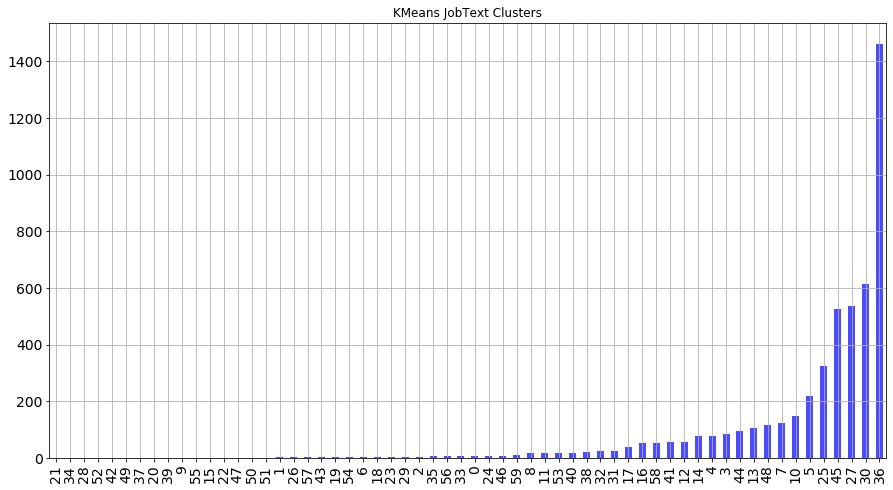

In [24]:
pd.Series(Counter(km.labels_)).sort_values().plot(kind='bar',
                                    rot=90, 
                                    figsize=(15, 8),
                                    fontsize=14,
                                    color='blue',
                                    title='KMeans JobText Clusters',
                                    grid=True,
                                    alpha=0.70);

In [60]:
small_df.loc[small_df['text_tri_6'] == 21, 'CleanJobTitle'].head(20)

57569                      Manufacturing Device Technician
38191                                       Unit Secretary
24083                                      General Manager
66945                                Flat Bed Truck Driver
10249                          Healthcare Customer Service
85510                                 Packaging Specialist
1410                              Over The Road Cdl Driver
10751                                     Systems Engineer
89585                       Inside Sales Manager, Software
73661    Geek Squad Deputy Of Counter Intelligence - Co...
76321                                   Loaner Coordinator
26679                      Sap Fi/Co Functional Consultant
18640                                   Material Processor
43573                                      Account Manager
80065                          Assistant Lms Administrator
89568                  International Corporate Tax Manager
15449                                       Technical Le

In [62]:
import os; os.cpu_count()

8

In [26]:
km.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01886792, 0.01886792, ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.18181818, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=60, n_init=25, n_jobs=4, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [30]:
km.inertia_

5028290.96377176

In [29]:
km.n_iter_

36

In [ ]:
count_vect_tri

## Hierarchical Approach

## Density Based Approach

### To Add

1. Distance metrics conditions to satisfy

In [63]:
import hdbscan

In [66]:
%%time

cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          min_samples=20,
                          ).fit(cv_text_bi)

CPU times: user 4.04 s, sys: 416 ms, total: 4.45 s
Wall time: 4.49 s


In [67]:
Counter(cluster.labels_)

Counter({-1: 5000})

#### Make your KMeans Algorithm Better

If you were to make a pipeline, this is how it would look

In [ ]:
from sklearn.pipeline import Pipeline

# you could add pca (TruncatedSVD might be better) here and the countvectorizer or td-idf vectorizer
# if you lower the dimmension to two, you will be able to visualise the results
preprocessor = Pipeline()



cluster_pipe = Pipeline(
        [
            (
             'kmeans', KMeans(
                              n_clusters=n_clusters,
                              init="k-means++",
                              n_init=25,
                              max_iter=1000,
                              random_state=42
                             )
            )
])

pipe = Pipeline([('preprocessor', preprocessor),
                 ('cluster_pipe', cluster_pipe)])

pipe.fit(data)

# if you were predicting, transform the data
preprocessed_data = pipe['preprocessor'].transform(data)

# extract the labels
km_labels = pipe['cluster_pipe']['kmeans'].labels_